# Project

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import entropy
from Bio import SeqIO
import numpy as np

# VAE


In [33]:
names = [
'query', 'subject', '%_identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '%_positives'
]
df_vae = pd.read_csv('vae.txt', sep='\t', header=None, names=names,comment='#')

df_vae.head(300)

,query,subject,%_identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,%_positives
0,s1,WP_066830146.1,44.510,337,102,20,1,252,1,337,7.080000e-50,179.0,53.12
1,s1,WP_190823484.1,43.988,341,100,22,1,252,4,342,2.540000e-49,177.0,54.25
2,s1,WP_022598333.1,42.647,340,106,17,1,252,4,342,3.640000e-49,177.0,50.88
3,s1,WP_084957095.1,42.353,340,107,17,1,252,4,342,9.120000e-49,176.0,50.88
4,s1,NKR31889.1,42.353,340,107,17,1,252,4,342,9.320000e-49,176.0,50.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,s3,WP_007794084.1,40.288,139,42,5,7,104,32,170,2.600000e-14,81.3,51.80
296,s3,WP_307098820.1,41.667,132,43,5,7,104,40,171,2.620000e-14,81.3,50.76
297,s3,WP_132591557.1,40.288,139,42,5,7,104,32,170,2.620000e-14,81.3,51.80
298,s3,WP_315703949.1,42.636,129,40,5,10,104,36,164,2.800000e-14,81.3,52.71


In [34]:
top_1_df_vae = df_vae.loc[df_vae.groupby('query')['%_identity'].idxmax()]
top_1_df_vae

,query,subject,%_identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,%_positives
47,s1,MDT5312062.1,45.141,319,99,18,10,252,13,331,2.310000e-47,172.0,53.61
989,s10,WP_151063567.1,45.946,259,34,17,1,153,3,261,2.580000e-29,122.0,49.42
9505,s100,WP_083028883.1,53.763,186,34,14,1,134,1,186,4.590000e-29,121.0,61.83
1005,s11,WP_168546752.1,46.988,83,36,5,12,86,23,105,6.490000e-05,53.5,63.86
1166,s12,WP_254472889.1,41.803,122,40,7,8,98,34,155,2.330000e-07,60.5,53.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,s95,WP_239262919.1,45.143,175,50,11,3,131,20,194,7.580000e-19,94.4,56.00
9082,s96,WP_200459769.1,37.615,218,51,15,9,142,47,263,3.390000e-11,72.8,44.95
9196,s97,WP_271578677.1,51.007,149,54,8,9,138,22,170,1.580000e-25,114.0,61.07
9282,s98,WP_005220607.1,55.918,245,27,22,3,166,9,253,7.870000e-44,160.0,60.82


In [35]:
top_1_df_vae_sorted = top_1_df_vae.sort_values(by='%_identity', ascending=False)
top_1_df_vae_sorted

,query,subject,%_identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,%_positives
2940,s31,WP_054994016.1,82.029,345,19,19,1,302,1,345,3.980000e-174,496.0,85.22
6440,s66,WP_218636460.1,68.132,91,11,7,6,78,21,111,1.690000e-21,98.6,75.82
4031,s41,WP_047797603.1,67.708,96,24,4,8,96,19,114,1.150000e-25,113.0,79.17
4144,s43,WP_095598937.1,66.667,90,12,6,7,78,24,113,2.950000e-18,89.7,73.33
1408,s15,MBL0779293.1,62.353,85,21,6,10,83,49,133,4.220000e-15,79.7,72.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,s22,WP_037103870.1,39.565,230,63,16,9,164,32,259,3.990000e-14,81.6,47.39
2906,s30,WP_029153306.1,39.216,102,42,5,7,90,13,112,1.500000e-02,46.2,53.92
5539,s57,WP_280267118.1,38.462,247,60,15,1,155,36,282,4.700000e-17,88.6,46.56
7958,s81,OHV32866.1,38.318,107,49,5,20,111,84,188,2.000000e-02,46.6,50.47


In [36]:
top_1_df_vae_sorted.to_csv("top1.txt")

In [37]:
df_vae_50 = df_vae[df_vae['%_identity'] > 50]
df_vae_50

,query,subject,%_identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,%_positives
138,s2,WP_311922963.1,51.786,168,43,10,34,164,72,238,9.480000e-31,124.0,63.10
147,s2,WP_310742113.1,51.190,168,44,10,34,164,72,238,3.900000e-30,122.0,62.50
486,s5,WP_242433235.1,52.381,84,24,5,12,80,24,106,2.540000e-07,57.8,60.71
490,s5,MBV9446535.1,53.947,76,22,4,7,69,16,91,3.600000e-07,57.0,64.47
494,s5,MQA01884.1,50.562,89,29,4,7,80,16,104,5.200000e-07,59.7,59.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,s100,WP_194980492.1,51.613,186,38,14,1,134,1,186,4.810000e-28,119.0,61.29
9574,s100,WP_194995696.1,51.613,186,38,14,1,134,1,186,4.860000e-28,119.0,61.29
9575,s100,WP_194985409.1,51.613,186,38,14,1,134,1,186,4.910000e-28,119.0,61.29
9577,s100,WP_280482005.1,51.613,186,38,14,1,134,1,186,4.960000e-28,119.0,61.29


In [38]:
df_vae_50_sorted = df_vae_50.sort_values(by='%_identity', ascending=False)
df_vae_50_sorted

,query,subject,%_identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,%_positives
2940,s31,WP_054994016.1,82.029,345,19,19,1,302,1,345,3.980000e-174,496.0,85.22
2941,s31,WP_096243786.1,82.029,345,19,19,1,302,1,345,4.490000e-174,496.0,85.22
2953,s31,WP_032613840.1,81.739,345,20,19,1,302,1,345,1.770000e-173,494.0,84.93
2983,s31,WP_044308356.1,81.739,345,20,19,1,302,1,345,5.890000e-173,493.0,84.35
2949,s31,WP_240845631.1,81.739,345,20,19,1,302,1,345,1.300000e-173,494.0,84.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6576,s67,CPX06691.1,50.220,227,40,16,1,154,397,623,1.080000e-36,145.0,56.39
6562,s67,WP_005095835.1,50.220,227,40,16,1,154,1,227,6.400000e-39,145.0,56.39
6561,s67,WP_062912731.1,50.220,227,40,16,1,154,1,227,6.400000e-39,145.0,56.39
6560,s67,WP_005082742.1,50.220,227,40,16,1,154,1,227,6.000000e-39,145.0,56.39


In [39]:
df_vae_50_sorted.to_csv('top_50.txt')

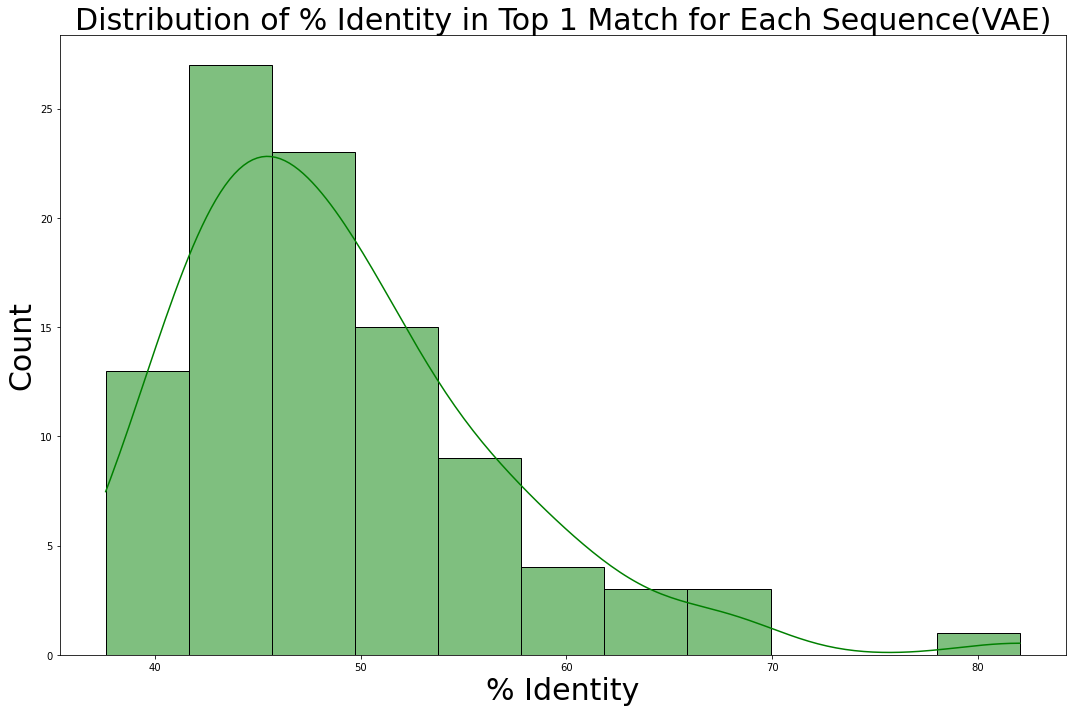

In [40]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 1, 1)
sns.histplot(top_1_df_vae['%_identity'], kde=True, color='green')
plt.title("Distribution of % Identity in Top 1 Match for Each Sequence(VAE)",fontsize=30)
plt.xlabel("% Identity",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.tight_layout()
plt.show()


In [42]:
subject_frequency = df_vae['subject'].value_counts().reset_index()
subject_frequency.columns = ['subject', 'frequency']

subject_frequency.head()


,subject,frequency
0,WP_277262861.1,3
1,WP_096243786.1,3
2,WP_096102692.1,3
3,MDF2642101.1,3
4,WP_122222772.1,3


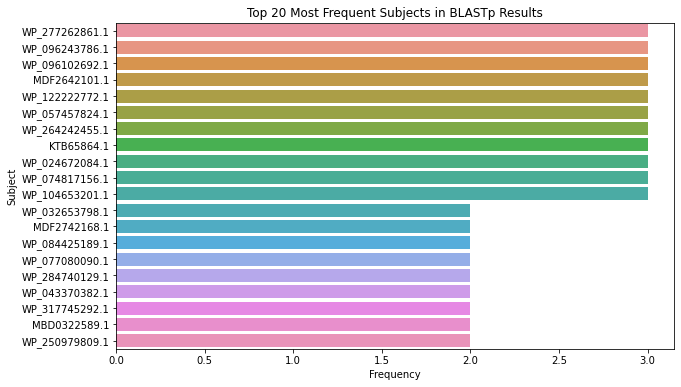

In [43]:
top_n = 20 
top_subjects = subject_frequency.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='subject', data=top_subjects)
plt.title(f'Top {top_n} Most Frequent Subjects in BLASTp Results')
plt.xlabel('Frequency')
plt.ylabel('Subject')
plt.show()

In [44]:
frequencies = subject_frequency['frequency']

frequencies = frequencies[frequencies > 0]  # Exclude zero frequencies
proportions = frequencies / frequencies.sum()
shannon_index =  -np.sum(proportions * np.log(proportions))

shannon_index

9.10066755473653

# Pro-gpt


In [45]:
names = [
'query', 'subject', '%_identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '%_positives'
]
df_1 = pd.read_csv('1.txt', sep='\t', header=None, names=names,comment='#')
df_2 = pd.read_csv('2.txt', sep='\t', header=None, names=names,comment='#')
df_3 = pd.read_csv('3.txt', sep='\t', header=None, names=names,comment='#')
df_4 = pd.read_csv('4.txt', sep='\t', header=None, names=names,comment='#')
df_5 = pd.read_csv('5.txt', sep='\t', header=None, names=names,comment='#')
df_6 = pd.read_csv('6.txt', sep='\t', header=None, names=names,comment='#')
df_7 = pd.read_csv('7.txt', sep='\t', header=None, names=names,comment='#')
df_8 = pd.read_csv('8.txt', sep='\t', header=None, names=names,comment='#')
df_9 = pd.read_csv('9.txt', sep='\t', header=None, names=names,comment='#')
df_10 = pd.read_csv('10.txt', sep='\t', header=None, names=names,comment='#')

In [46]:
df_gpt = pd.concat([df_1, df_2, df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10], axis=0)

In [47]:
top_1_df_gpt = df_gpt.loc[df_gpt.groupby('query')['%_identity'].idxmax()]
top_1_df_gpt

,query,subject,%_identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,%_positives
517,s11,MBN8739607.1,37.456,283,139,10,95,350,88,359,2.350000e-15,89.0,49.12
517,s65,WP_092453246.1,45.320,203,107,2,3,204,2,201,2.540000e-47,177.0,60.10
46,s4,CDP32597.1,26.064,188,119,5,37,205,24,210,4.520000e-04,53.9,47.34
46,s12,MBK7141588.1,40.379,317,183,4,71,381,87,403,1.450000e-65,224.0,58.68
46,s23,WP_249298884.1,39.039,333,197,6,8,336,36,366,1.080000e-57,205.0,57.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,s29,WP_012976068.1,36.471,170,107,1,148,317,140,308,1.030000e-08,69.7,45.29
330,s43,MBK9110686.1,42.857,49,28,0,16,64,8,56,2.900000e-02,45.8,69.39
330,s60,WP_207514868.1,34.596,1003,588,26,3,958,80,1061,8.190000e-160,511.0,52.74
330,s75,WP_073782173.1,25.666,413,262,15,68,462,35,420,8.660000e-15,89.4,41.40


In [48]:
df_gpt_50 = df_gpt[df_gpt['%_identity'] > 50]
df_gpt_50

,query,subject,%_identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,%_positives
346,s8,WP_238552226.1,51.560,545,251,4,161,698,380,918,0.000000e+00,555.0,68.26
350,s8,WP_296500243.1,51.763,539,259,1,161,698,365,903,0.000000e+00,553.0,67.90
362,s8,MBI5753406.1,50.360,556,269,5,153,703,240,793,1.200000e-180,545.0,68.17
369,s8,MDD5364866.1,50.368,544,267,3,150,691,248,790,4.910000e-180,544.0,68.01
403,s8,MDP2821943.1,50.826,545,261,3,161,698,396,940,3.530000e-178,544.0,68.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,s97,TML53532.1,54.000,100,44,1,2,99,1,100,2.440000e-18,97.4,68.00
314,s97,MDQ4109175.1,50.526,95,45,1,5,97,4,98,2.570000e-18,97.8,64.21
315,s97,MBI2238880.1,53.608,97,44,1,4,99,3,99,2.610000e-18,97.8,64.95
317,s97,MBV8258429.1,51.020,98,48,0,2,99,1,98,2.980000e-18,97.4,65.31


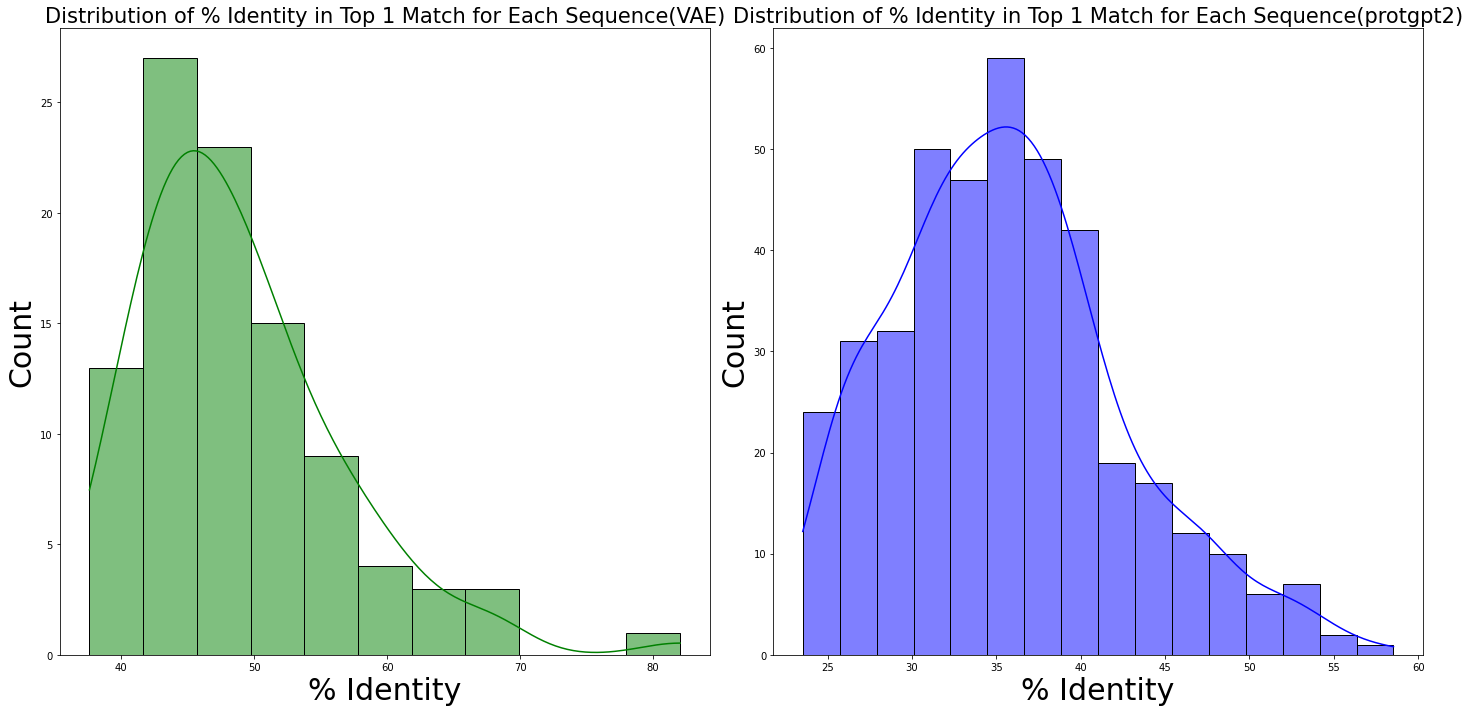

In [62]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(top_1_df_vae['%_identity'], kde=True, color='green')
plt.title("Distribution of % Identity in Top 1 Match for Each Sequence(VAE)",fontsize=21)
plt.xlabel("% Identity",fontsize=30)
plt.ylabel("Count",fontsize=30)

plt.subplot(1, 2, 2)
sns.histplot(top_1_df_gpt['%_identity'], kde=True, color='blue')
plt.title("Distribution of % Identity in Top 1 Match for Each Sequence(protgpt2)",fontsize=21)
plt.xlabel("% Identity",fontsize=30)
plt.ylabel("Count",fontsize=30)

plt.tight_layout()
plt.show()

In [50]:
subject_frequency = df_gpt['subject'].value_counts().reset_index()
subject_frequency.columns = ['subject', 'frequency']

subject_frequency.head()

,subject,frequency
0,MBC8410671.1,5
1,MDC0541525.1,5
2,MCA6557617.1,4
3,MCB2160536.1,4
4,WP_287733781.1,4


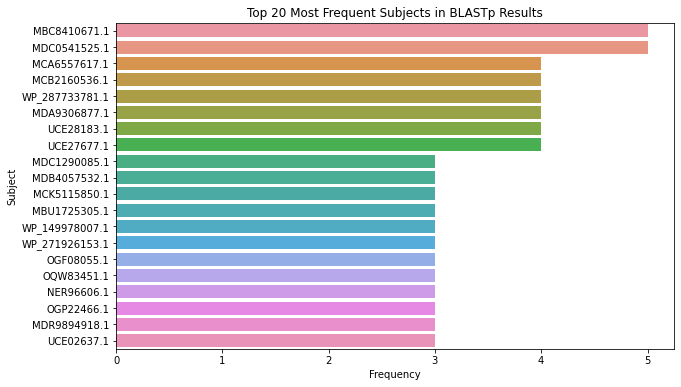

In [51]:
top_n = 20 
top_subjects = subject_frequency.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='subject', data=top_subjects)
plt.title(f'Top {top_n} Most Frequent Subjects in BLASTp Results')
plt.xlabel('Frequency')
plt.ylabel('Subject')
plt.show()

In [52]:
frequencies = subject_frequency['frequency']
frequencies = frequencies[frequencies > 0]  # Exclude zero frequencies
proportions = frequencies / frequencies.sum()
shannon_index =  -np.sum(proportions * np.log(proportions))
shannon_index

8.218916535707534

In [53]:
df_gpt['%_identity'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      40.598
1      40.171
2      40.171
3      25.697
4      26.326
        ...  
425    34.733
426    35.632
427    32.941
428    33.846
429    32.677
Name: %_identity, Length: 4005, dtype: float64>

In [54]:
df_vae['%_identity'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       44.510
1       43.988
2       42.647
3       42.353
4       42.353
         ...  
9576    42.857
9577    51.613
9578    41.479
9579    52.151
9580    41.892
Name: %_identity, Length: 9581, dtype: float64>

In [55]:
def calculate_diversity_score_at_position(sequences, position):
    amino_acids = [seq[position] for seq in sequences]
    frequencies = {aa: amino_acids.count(aa) / len(amino_acids) for aa in set(amino_acids)}
    entropy = -sum(freq * np.log2(freq) for freq in frequencies.values() if freq > 0)
    return entropy

fasta_file = 'seq/hmm_nonoverlap.fa'
sequences = [str(record.seq) for record in SeqIO.parse(fasta_file, "fasta")]

min_length = min(len(seq) for seq in sequences)

diversity_scores = [calculate_diversity_score_at_position(sequences, pos) for pos in range(min_length)]

total_diversity_score = sum(diversity_scores)/len(diversity_scores)

print(f"Average Diversity Score: {total_diversity_score}")

Average Diversity Score: 3.877241676862211
